In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
columns = [
    "bornAt",
    "lastMovedAt",
    "tag",
    "size",
    "arrayLen",
    "address",
    "gcTime",
    "gcId",
    "allocationSite",
    "lifetime",
    "type",
    "isArray",
    "arrayLen_2",
    "bornTime_2"
]

In [ ]:
df = pd.read_csv("../outputs/benchmark_v1_trace.csv", names=columns)

In [5]:
df

,bornAt,lastMovedAt,tag,size,arrayLen,address,gcTime,gcId,allocationSite,lifetime,type,isArray,arrayLen_2,bornTime_2
0,0,-1,20,16,0,4289726304,235,1,VM internal:-1,3.0,[I,True,0.0,232.0
1,0,-1,26,16,0,4289726664,235,1,VM internal:-1,3.0,[I,True,0.0,232.0
2,0,-1,28,16,0,4289726800,235,1,VM internal:-1,3.0,[I,True,0.0,232.0
3,0,-1,30,16,0,4289726920,235,1,VM internal:-1,3.0,[I,True,0.0,232.0
4,0,-1,34,16,0,4289727160,235,1,VM internal:-1,3.0,[I,True,0.0,232.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
883595,7,-1,918390,16,-1,4292835456,287,8,Bench.main([Ljava/lang/String;)V:40,3.0,LHahaAClass;,False,-1.0,284.0
883596,7,-1,918391,16,-1,4292835472,287,8,Bench.main([Ljava/lang/String;)V:40,3.0,LHahaAClass;,False,-1.0,284.0
883597,7,-1,918392,16,-1,4292835488,287,8,Bench.main([Ljava/lang/String;)V:40,3.0,LHahaAClass;,False,-1.0,284.0
883598,7,-1,918393,16,-1,4292835504,287,8,Bench.main([Ljava/lang/String;)V:40,3.0,LHahaAClass;,False,-1.0,284.0


In [25]:
def get_groups(group_by_cols, N=100):
    groups = df.groupby(group_by_cols)
    
    N = 100

    types = []
    for name, group in groups:
        # skip classes which have <N objects
        if len(group) >= N:
            types.append(name)
    
    return types, groups

In [26]:
types, groups = get_groups("type", N=100)
num_types = len(types)

## Distribution of lifetimes for each type

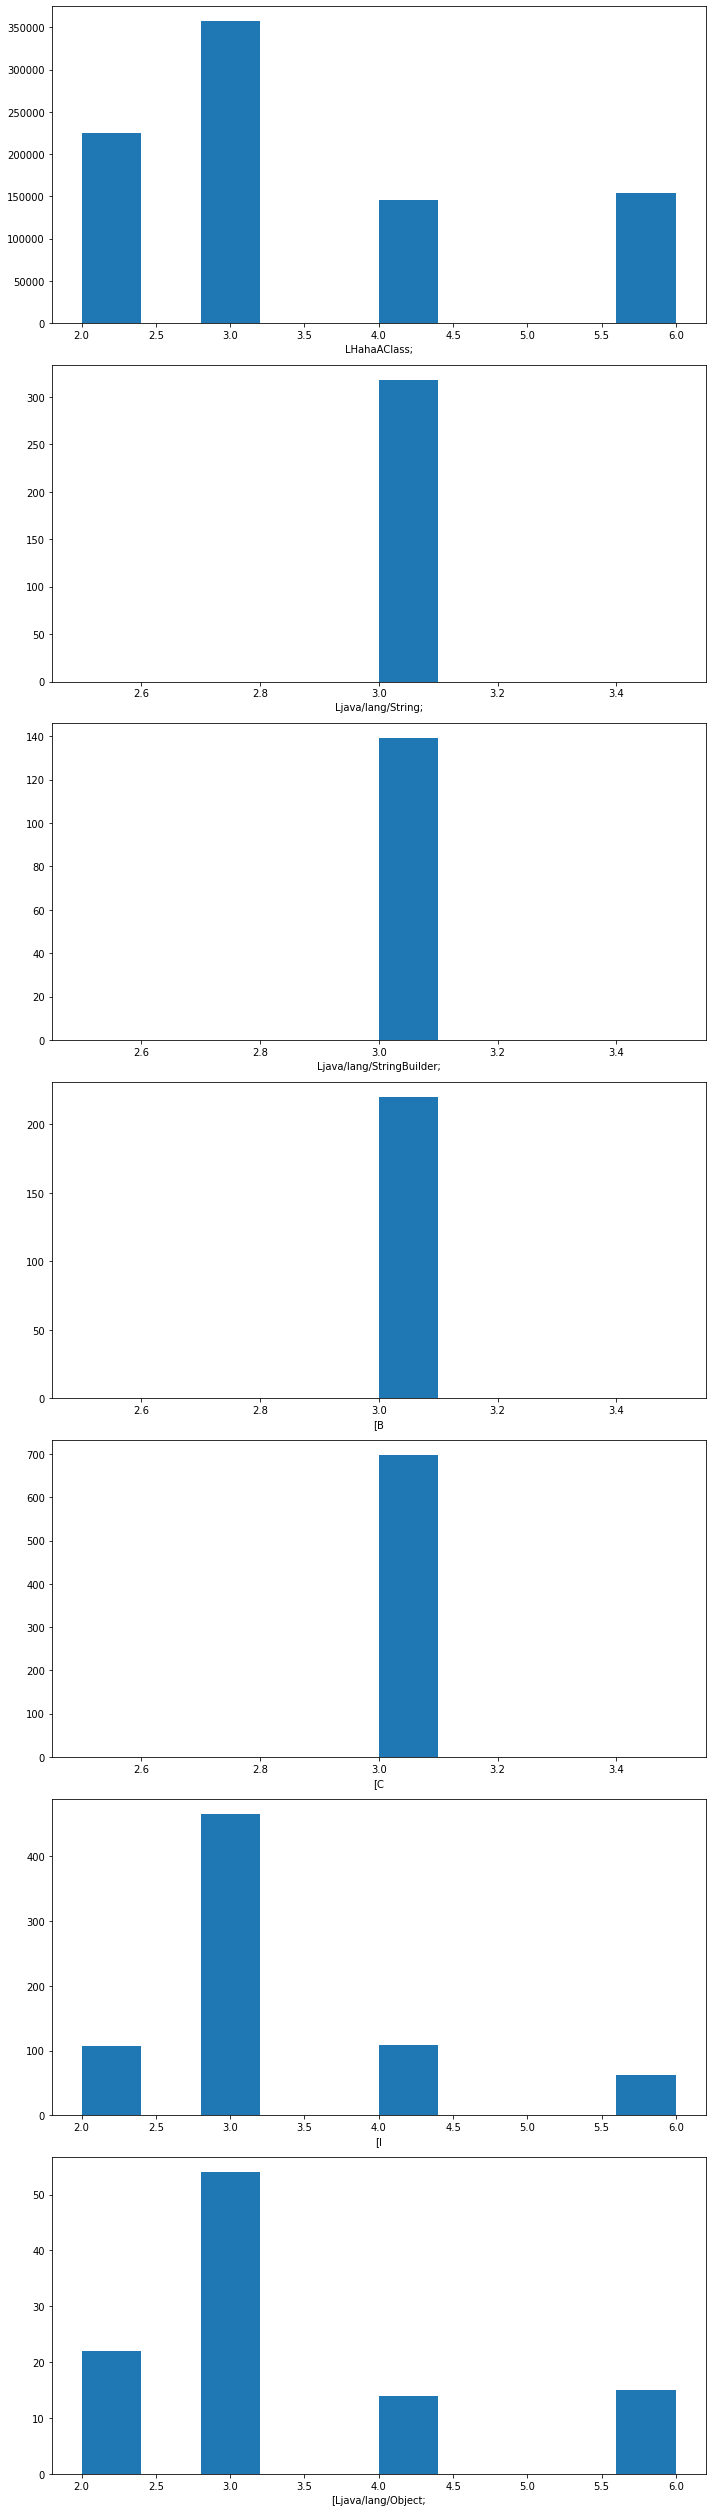

In [27]:
fig, axs = plt.subplots(num_types, 1, tight_layout=True, figsize=(10, 5 * num_types))

for name, ax in zip(types, axs):
    group = groups.get_group(name)
    # display(group)
    # print(name)
    
    ax.hist(group.lifetime)
    ax.set_xlabel(name)

## Average lifetime of each class

getting mean of all types...


<BarContainer object of 7 artists>

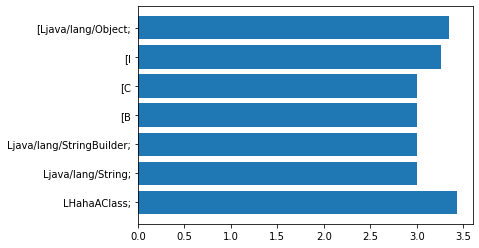

In [38]:
means = []
print("getting mean of all types...")

for name in types:
    group = groups.get_group(name)
    
    means.append(group.lifetime.mean())
    
plt.barh([i for i in range(num_types)], means, tick_label=types)
# plt.xticks(rotation=45)

## Average lifetime of each class grouped by allocation site

In [39]:
alloc_site_group_names, alloc_site_groups = get_groups(["type", "allocationSite"], 10)
num_names = len(alloc_site_group_names)

In [40]:
alloc_site_group_names

[('LHahaAClass;', 'Bench.main([Ljava/lang/String;)V:40'),
 ('Ljava/lang/String;', 'VM internal:-1'),
 ('[C', 'java.lang.AbstractStringBuilder.<init>(I)V:6'),
 ('[C', 'java.util.Arrays.copyOf([CI)[C:1'),
 ('[C', 'java.util.Arrays.copyOfRange([CII)[C:40'),
 ('[I', 'VM internal (Object filler):-1'),
 ('[I', 'VM internal:-1')]

getting mean of all types...


<BarContainer object of 7 artists>

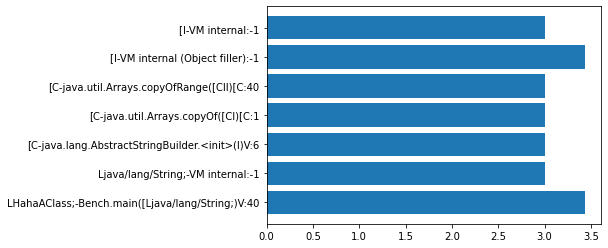

In [41]:
means = []
print("getting mean of all types...")

for name in alloc_site_group_names:
    group = alloc_site_groups.get_group(name)
    
    means.append(group.lifetime.mean())
    
plt.barh([i for i in range(num_names)], means, tick_label=["-".join(i) for i in alloc_site_group_names])
# plt.xticks(rotation=90)